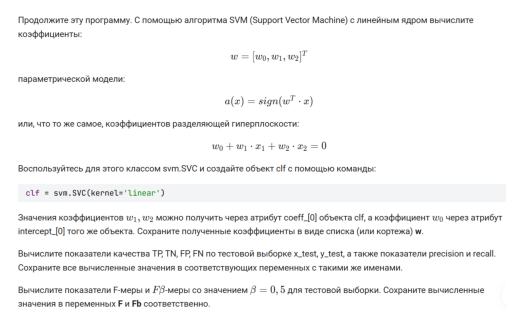

In [1]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../img/4_5_3.png')  # Загрузите изображение, указав путь к файлу.
plt.imshow(img)  # Отобразите изображение.
plt.axis('off')  # Отключите отображение осей.
plt.show()

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split

np.random.seed(0)

# исходные параметры распределений классов
r1 = 0.2
D1 = 3.0
mean1 = [2, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [-1, -1]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# моделирование обучающей выборки
N1 = 2500
N2 = 1500
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T

data_x = np.hstack([x1, x2]).T
data_y = np.hstack([np.ones(N1) * -1, np.ones(N2)])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.4, shuffle=True)

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
w = [clf.intercept_[0], *clf.coef_[0]]
predict = clf.predict(x_test)
TP = predict[(predict == 1) & (y_test == 1)].size
FP = predict[(predict == 1) & (y_test== -1)].size
TN = predict[(predict == -1) & (y_test == -1)].size
FN = predict[(predict == -1) & (y_test == 1)].size
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F = 2 * precision * recall / (precision + recall) # объединение полноты и точности - f-мера
Fb = (1 + 0.5 ** 2) * precision * recall / (0.5 ** 2 * precision + recall)
precision, recall, F, Fb, w, predict

ValueError: shapes (3,) and (2,1600) not aligned: 3 (dim 0) != 2 (dim 0)